# Statistics of the Character Table of Symmetric Groups $S_n$

In this Jupyter Notebook, we aim to study some properties of the character table of the symmetric group $S_n$.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from sympy.polys.rings import ring
from sympy.polys.domains import ZZ
from sympy.utilities.iterables import partitions

### [Frobenius's Formula](https://en.wikipedia.org/wiki/Frobenius_formula)

#### The following implementation should be slower than the Murnaghan-Nakayama Rule later will be introduced, since it has to compute all of the coefficients of the polynomial below.

#### N = 6: ~6 sec

#### N = 7: ~30 min

Given an integer partition $\lambda = \lambda_1 + \lambda_2 + \cdots + \lambda_k$ of $n$, let $\chi^{\lambda}$ be the corresponding irreducible character of $S_n$, and let $\chi^{\lambda}_{\mu}$ be short for the value of $\chi^{\lambda}$ at any $g$ with cycle type $\mu$, denote $l_j  =\lambda_j + k - j$, and $i_j$ the number of times $j$ appears in $\mu$, so $\sum\limits_j i_jj = n$, then we have the following Frobenius's Formula: 

 $\chi^{\lambda}_{\mu} = \text{coeff. of }  x_{1}^{l_1} x_{2}^{l_2}\cdots x_{k}^{l_k}$ in $\Delta(x) P_{\mu}(x)$
 
  
where $\Delta(x) = \prod\limits_{1 \leq i < j \leq k} (x_i-x_j)$ is the anti-symmetrizer and $P_\mu(x) = \prod\limits_j P_j(x_1,\cdots, x_k)^{i_j}$, where $P_j(x_1,\cdots, x_k) = x_1^j + \cdots + x_k^j$ is the $j$-th sum.

In [5]:
N = 5 # the size of the character table
R, *x = ring("x_0 x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8 x_9 x_10", ZZ)


In [6]:
def convert_dict_partitions_to_list():
    index = list(partitions(N))
    partitions_list = []
    for pair in index:
        tmp = []
        for key in pair:
            for _ in range(pair[key]):
                tmp.append(key)
        partitions_list.append(tmp)
    return partitions_list

def Delta(k):
    return R.mul([x[i] - x[j] for j in range(2, k+1) for i in range (1, j)])

def P(j, k):
    # return the k-th power sum of the list of variables x
    return sum([x[i]**j for i in range(1, k+1)])

def character(irrep : list, conj_class : list):
    kv = {}
    for num in conj_class:
        if num not in kv:
            kv[num] = conj_class.count(num)
    P_conj_class = R.mul([R.mul([P(i, len(irrep)) for _ in range(kv[i])]) for i in kv])
    P_conj_class = R.mul([P_conj_class, Delta(len(irrep))])
    monomial = R.mul([x[i]**(len(irrep) + irrep[i - 1] - i) for i in range(1, len(irrep) + 1)])
    return P_conj_class.coeff(monomial)

partition_list = convert_dict_partitions_to_list()
character_table = [[0 for _ in range(len(partition_list))] for _ in range(len(partition_list))]

for i in range(len(partition_list)):
    for j in range(len(partition_list)):
        character_table[i][len(partition_list) - j - 1] = character(partition_list[i], partition_list[j])

print(character_table)

[[1, 1, 1, 1, 1, 1, 1], [4, 2, 0, 1, -1, 0, -1], [5, 1, 1, -1, 1, -1, 0], [6, 0, -2, 0, 0, 0, 1], [5, -1, 1, -1, -1, 1, 0], [4, -2, 0, 1, 1, 0, -1], [1, -1, 1, 1, -1, -1, 1]]


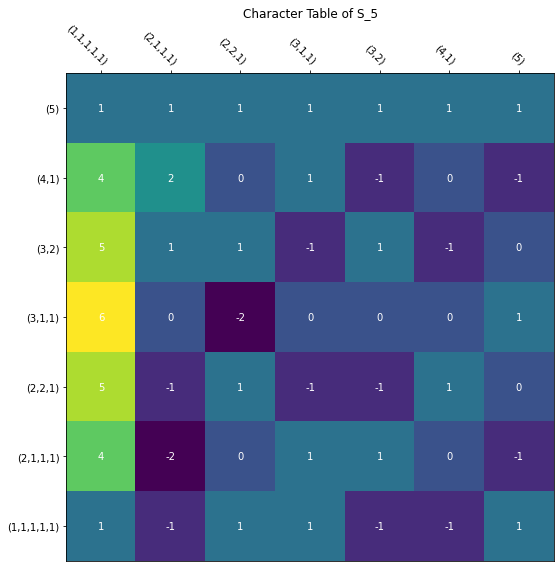

In [7]:
def exp_label(partition):
    res = "("
    for key in partition[0:len(partition)-1]:
        res += "{},".format(key)
    res += "{})".format(partition[len(partition) - 1])
    return res

ylabel = [exp_label(partition) for partition in partition_list]
xlabel = [ylabel[i] for i in range(len(ylabel)-1, -1, -1)]


fig, ax = plt.subplots(figsize=(20, 8))
im = ax.imshow(character_table)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(xlabel)), labels=xlabel)
ax.set_yticks(np.arange(len(ylabel)), labels=ylabel)
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(xlabel)):
    for j in range(len(ylabel)):
        text = ax.text(j, i, character_table[i][j],
                       ha="center", va="center", color="w")

ax.set_title("Character Table of S_{}".format(N))
fig.tight_layout()
plt.show()

Now we study some character tables with bigger sizes.

Modify the following macros to change the size of the character table as well as the threshold for the heatmap.

Since the value for some entries are too big, in order to make the color look proportional, we can truncate the value and set up a threshold for the heatmap

In [75]:
SIZE = 20 # char table size
THRESHOLD = 500
 # the maximum is THRESHOLD, the minimum is -THRESHOLD

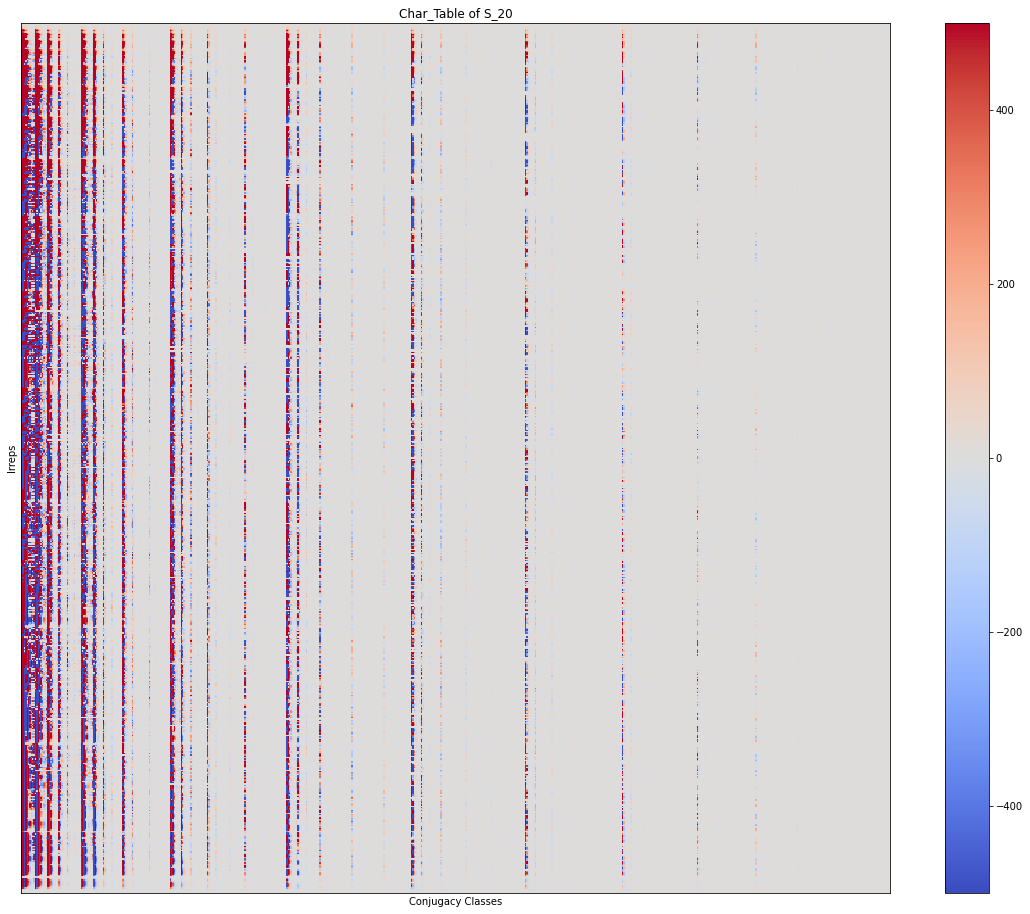

In [76]:

df = pd.read_csv("char_{}.csv".format(SIZE))
df_wo_first_column = df.iloc[1:, 2:] # skip the first column
data_array = df_wo_first_column.values
data_array = np.clip(df_wo_first_column.values, -THRESHOLD, THRESHOLD)
vmin, vmax = data_array.min(), data_array.max()
fig, ax = plt.subplots(figsize=(20, 16))
im = ax.imshow(data_array, cmap='coolwarm', interpolation='nearest', vmin=vmin, vmax=vmax)
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(im)
plt.xticks(range(len(df_wo_first_column.columns)), df_wo_first_column.columns)
plt.yticks(range(len(df_wo_first_column.index)), df_wo_first_column.index)
plt.xlabel('Conjugacy Classes')
plt.ylabel('Irreps')
plt.title('Char_Table of S_{}'.format(SIZE))
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
# Show the plot
# column for triangular number 
plt.show()

### Distribution of the first column

Now we focus on the first column of the character table, note that they are all positive according to the hook length formula.

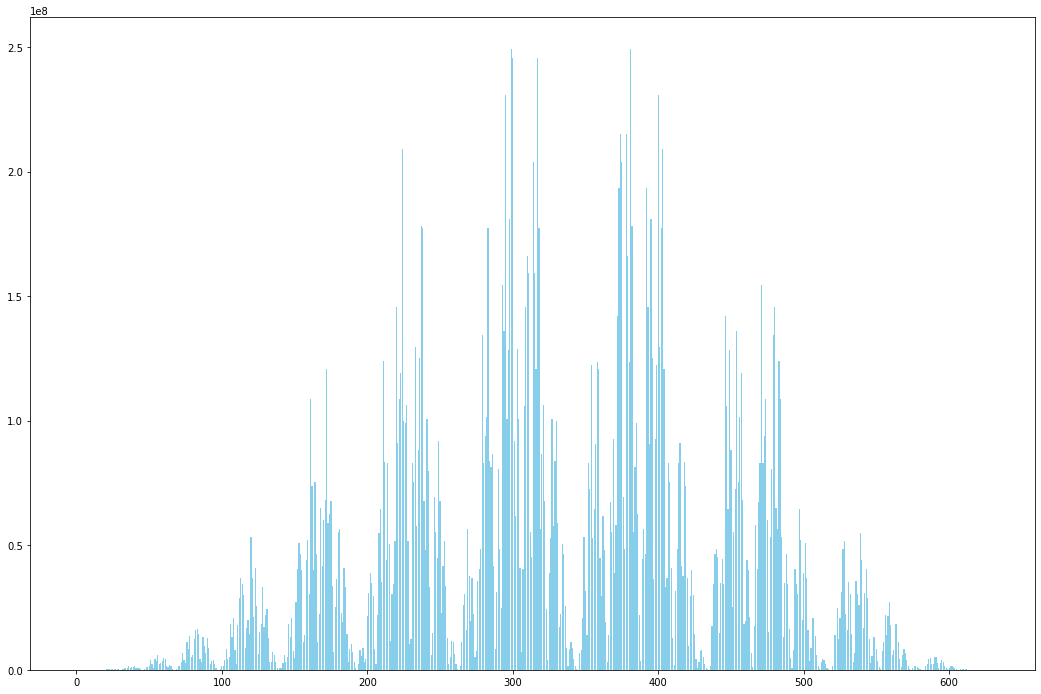

In [77]:
first_column = df.iloc[:,1]
positions = range(len(first_column))
values = first_column.values
plt.subplots(figsize=(18, 12))
plt.bar(positions, values, color='skyblue')
plt.show()

### The Density of Zeros in the Character Table of $S_n$
Now we study the number of zero entries in the character table of $S_n$ (it is recorded in OEIS with index [A006907](https://oeis.org/A006907)).

In [11]:
num_of_zeros = [0,0,1,4,10,29,55,153,307,588,1018,2230,3543,6878,
 11216,20615,33355,57980,90194,155176,239327,
 395473,604113,970294,1453749,2323476,3425849,
 5349414,7905133,11963861,17521274,26472001,
 38054619,56756488,81683457,119005220,170498286,
 247619748]

num_of_partitions = [1,2,3,5,7,11,15,22,30,42,56,77,101,135,176,231,
 297,385,490,627,792,1002,1255,1575,1958,2436,3010,
 3718,4565,5604,6842,8349,10143,12310,14883,17977,
 21637,26015,31185,37338,44583,53174,63261,75175,
 89134,105558,124754,147273,173525]

density_of_zeros = [num_of_zeros[i] / (num_of_partitions[i]**2) for i in range(38)]

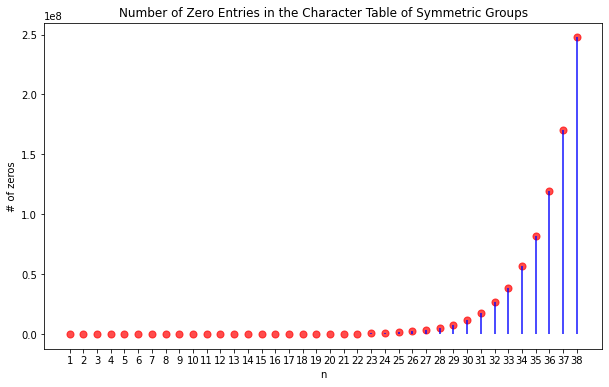

In [12]:
df = pd.DataFrame({'Values': num_of_zeros})
fig, ax = plt.subplots(figsize=(10, 6))
ax.vlines(x=df.index, ymin=0, ymax=df['Values'], color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df['Values'], color='red', s=50, alpha=0.7)
ax.set_xticks(df.index)
ax.set_xticklabels(df.index + 1)  # Assuming the data is 0-indexed
ax.set_xlabel('n')
ax.set_ylabel('# of zeros')
ax.set_title('Number of Zero Entries in the Character Table of Symmetric Groups')
plt.show()

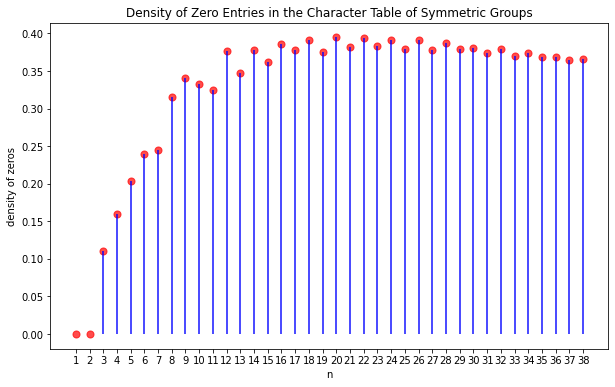

In [13]:
df2 = pd.DataFrame({'Values': density_of_zeros})
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.vlines(x=df2.index, ymin=0, ymax=df2['Values'], color='blue', alpha=0.7, linewidth=2)
ax2.scatter(x=df2.index, y=df2['Values'], color='red', s=50, alpha=0.7)
ax2.set_xticks(df2.index)
ax2.set_xticklabels(df2.index + 1)
ax2.set_xlabel('n')
ax2.set_ylabel('density of zeros')
ax2.set_title('Density of Zero Entries in the Character Table of Symmetric Groups')
plt.show()

Now it's natural to ask about the proportion of zeros in the character table since it seems to approaching to some limit, according to the diagram above.

In order to detect zeros in the character table, we can use the following corollary of Murnaghan-Nakayama rule.

##### Lemma

Let $\lambda$ and $\mu$ be partitions of $n$. If $\mu$ has a part of size $t$ and $\lambda$ is a $t$-core, then $\chi_{\mu}^{\lambda} = 0$.



Let $c_t(n)$ be the number of $t$-core partitions of $n$, and $p(n)$ be the number of partitions of $n$.

One lower bound of $c_t(n)$ is given as follows.

$c_t(n) \geq p(n) - (t+1)p(n-t)$

which results in a lower bound of $\Omega(\frac{1}{\log n})$. (add reference here)

In fact, we have the following generating function of $c_t(n)$ is

 $\sum\limits_{n=0}^{\infty}c_t(n)q^n = \dfrac{(q^t;q^t)_{\infty}^t}{(q;q)_{\infty}}$

 where we have the standard $q$-series notation:

 $(a;q)_0 = 1$

 $(a;q)_n = (1-a)(1-aq)\cdots (1-aq^{n-1})$

 $(a;q)_{\infty} = \lim\limits_{n \rightarrow \infty}(a;q)_n, |{q}| < 1$

 In particular, we have  $\sum\limits_{n=0}^{\infty}c_2(n)q^n = \dfrac{(q^2;q^2)_{\infty}^2}{(q;q)_{\infty}} = \sum\limits_{n \geq 0}q^{{n+1}\choose 2}$, which explains the following fact in the character table of $S_n$ where $n$ is a triangular number, at the row corresponding to the irreducible representation $\lambda = (n,n-1,\cdots,1)$: For any conjugacy class $\mu$ with a part being $2$, we have $\chi_{\mu}^{\lambda} = 0$.

 This can be proved by using Jacobi Triple Product.

 (JTP) $\prod\limits_{m=1}^{\infty}(1-x^{2m})(1+x^{2m-1}y^2)(1+\frac{x^{2m-1}}{y^2}) = \sum\limits_{n=-\infty}^{\infty}x^{n^2}y^{2n}$

 $\sum\limits_{n=-\infty}^{\infty}q^{\frac{n}{2}}q^{\frac{n^2}{2}} = \prod\limits_{m=1}^{\infty} (1-q^{2m})(1+q^{m-1})$, when we plug in $x = \sqrt{q}, y = \sqrt[4]{q}$

 We have $\sum\limits_{n=0}^{\infty} q^{{n+1} \choose 2} = \frac{1}{2}\sum\limits_{n=-\infty}^{\infty}q^{\frac{n}{2}}q^{\frac{n^2}{2}}$